#### Imports

In [9]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

#### Basic exploriation

In [10]:
data = pd.read_csv('water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
data.shape

(3276, 10)

In [7]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [40]:
potability = data['Potability']
yes, no = 0,0
for i in potability:
    if (i==1):
        yes+=1
    else:
        no+=1

print("Potable water: "+str(yes)+"\nNon Potable water: "+str(no))

Potable water: 1278
Non Potable water: 1998


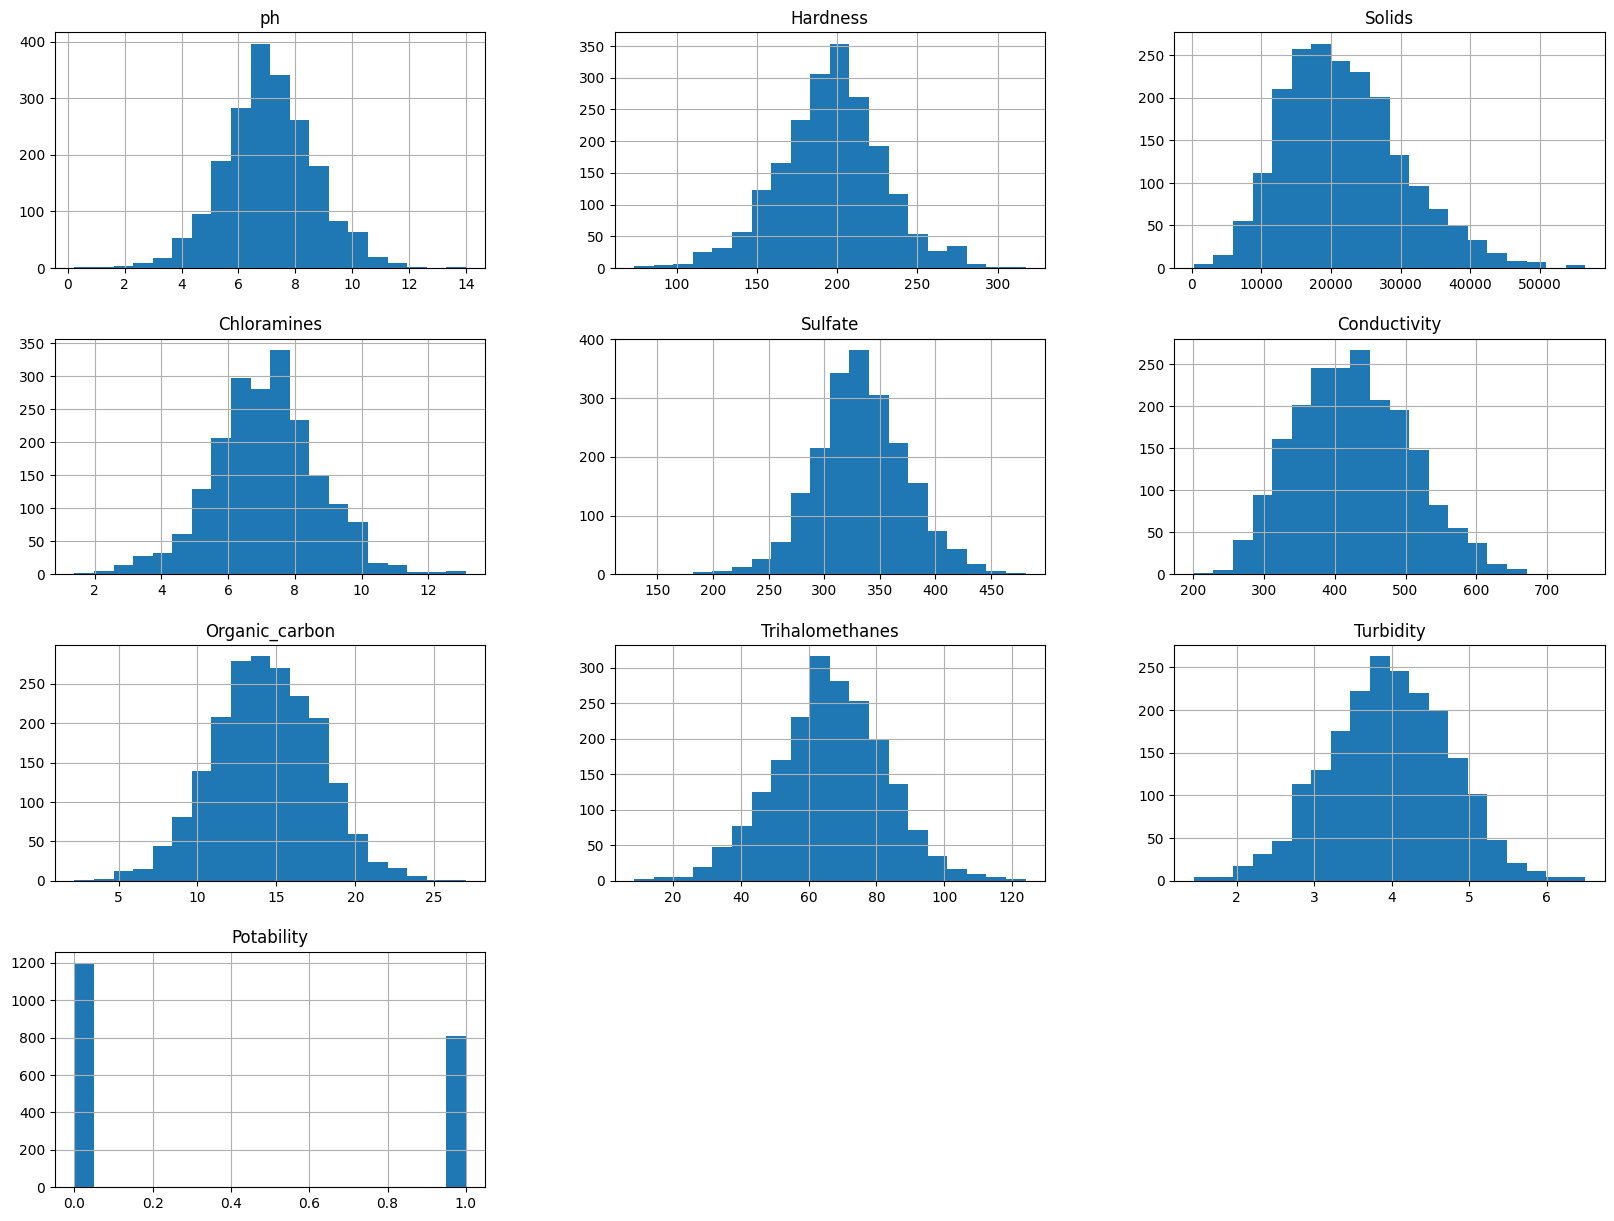

In [8]:
data.hist(bins=20, figsize=(20,15))
plt.show()

##### Outliers

<Axes: >

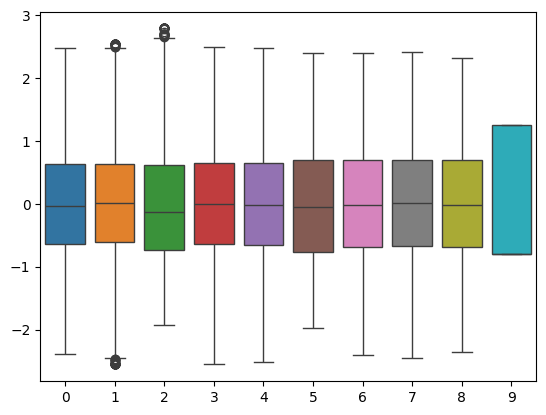

In [33]:
#Some preprocessing to scale the colums
scaler = StandardScaler().fit(data)
scaled_data = scaler.transform(data)
sns.boxplot(scaled_data)

As you can see, there are some significant outliers and we need to remove them in the preprocessing so that our model is trained properly. 

In [32]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

data = cap_data(data)

capping the  ph
capping the  Hardness
capping the  Solids
capping the  Chloramines
capping the  Sulfate
capping the  Conductivity
capping the  Organic_carbon
capping the  Trihalomethanes
capping the  Turbidity
capping the  Potability


/tmp/ipykernel_1905/3370870163.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][df[col] <= percentiles[0]] = percentiles[0]
/tmp/ipykernel_1905/3370870163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

##### Now let us check which columns have the null values

<Axes: >

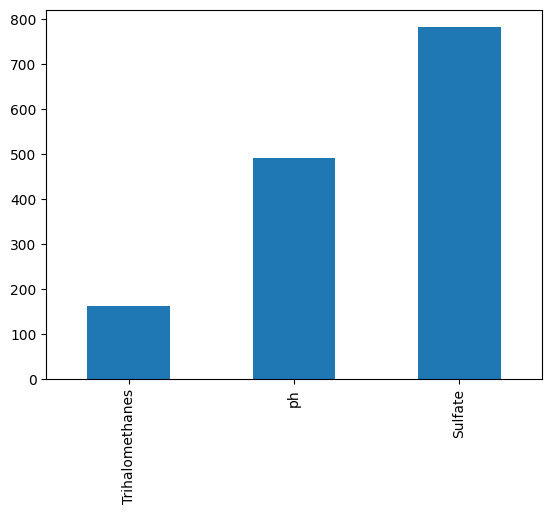

In [10]:
null_values = data.isnull().sum()
null_values = null_values[null_values > 0]
null_values.sort_values(inplace=True)
null_values.plot.bar()

#### Correlation

This is to see how each feature are correlated affect the final Potability. Remember the correlation of a feature with itself is one. 

In [35]:
correlation = data.corr()
print(correlation['Potability'].sort_values(ascending=False),"\n")

Potability         1.000000
Solids             0.032837
Chloramines        0.023341
Trihalomethanes    0.007023
Turbidity          0.001850
ph                -0.002659
Conductivity      -0.008446
Hardness          -0.013558
Sulfate           -0.021212
Organic_carbon    -0.028173
Name: Potability, dtype: float64 



<Axes: title={'center': 'Correlation of different features of the dataset'}>

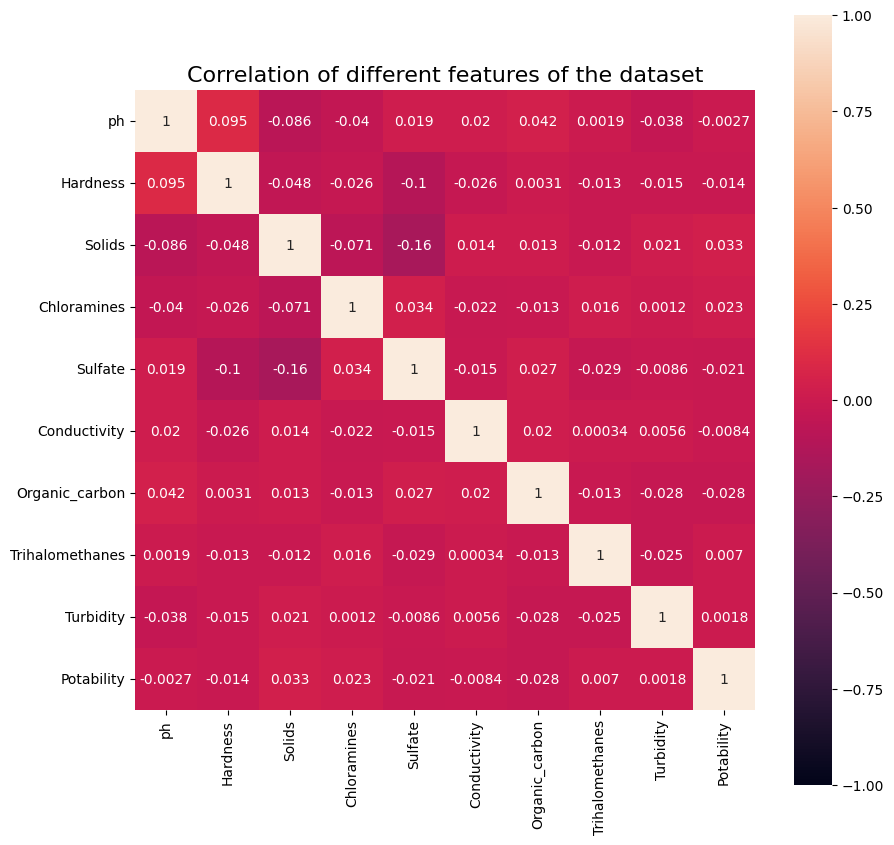

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Correlation of different features of the dataset", y=1, size=16)
sns.heatmap(correlation, square=True,annot=True, ax=ax, vmax=1, vmin=-1)

From this we can see that even though nere is not much correlation between different columns and the end potability itself, the different columns have some postitive and negative correlation amongst themselves.

#### Some basic multivariate analysis

##### Lin. Reg.

In [16]:
# Drop rows with Null values
new_data = data.dropna()
x = new_data.drop("Potability", axis=1).dropna(axis=0)
y = new_data["Potability"]

lin_reg = linear_model.LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

#### Pre-Processing

##### Removing Outliers:

In [ ]:
for x in wp.columns:
    if x =="ph":
        print(x)
        df_subset = wp[((wp[x] < 6.5) | (wp['ph'] > 8.5))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Hardness':
        print("----------------")
        print(x)
        df_subset = wp[((wp[x] >100))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Solids':
        print("----------------")
        print(x)
        df_subset = wp[((wp[x] >1200))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Chloramines':
        print("----------------")
        print(x)
        df_subset = wp[((wp[x] >4))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Sulfate':
        print("----------------")
        print(x)
        df_subset = wp[((wp[x] >250))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Conductivity':
        print("----------------")
        print(x)
        df_subset = wp[((wp[x] >400))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Organic_carbon':
        print("----------------")
        print(x)
        df_subset = wp[((wp[x] >2))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2)) 
    if x== 'Trihalomethanes':
        print("----------------")
        print(x)
        df_subset = wp[((wp[x] >80))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Turbidity':
        print("----------------")
        print(x)
        df_subset = wp[((wp[x] >5))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))

# Friday 29th March ------------------------------------------------------------------------

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 157.2 KB


In [11]:
# Delteing rows with NaN

data = data.dropna(axis=0,how='any').reset_index(drop=True)


#### Feature Scaling

Here I'm using Standard Scalar from Sklearn. This is because our dataset contains some outliers. Even though it is desireable to remove them, I want to see what kind of model we will get if we include them. And Standard Scalar works well with outliers. 

In [57]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


### I'm doing something different. Implementing an ANN to predict the potability instead of traditional ML

#### This I'm doing:
- Using BCE (Binary Cross Entropy) function as the loss function.
- 

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split

#Feature and target

features = list(data.columns)
features.pop()

X = data.loc[:, features]
Y = data.loc[:, ['Potability']]

print(Y)

# Splitting the data 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .80)


      Potability
0              0
1              0
2              0
3              0
4              0
...          ...
2006           1
2007           1
2008           1
2009           1
2010           1

[2011 rows x 1 columns]


In [27]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
temp = scaler.fit_transform(X_train)
data2 = pd.DataFrame(temp, columns=X_train.columns)
X_train = data2

scaler2 = StandardScaler()
temp2 = scaler.fit_transform(X_test)
data21 = pd.DataFrame(temp2, columns=X_test.columns)
X_test = data21


In [7]:
X_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.636922,0.650936,1.796939,0.094480,-0.532867,-1.842133,-0.370612,0.788369,0.606441
1,-0.190840,-0.466479,0.168290,-1.135653,-0.009680,0.426622,-0.207634,-0.343185,0.252742
2,NaN,-0.434054,-0.520612,-0.565259,0.408051,0.255727,-1.160750,-2.133503,0.070667
3,0.386700,-0.492822,-0.433358,0.716647,0.031897,1.137102,-1.106028,-0.180701,-0.099601
4,-0.768297,-0.894199,0.873125,0.849047,0.019802,0.836771,0.749445,0.222817,1.551522


In [98]:
# Hyperparameter values

hidden_units=100
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100

In [99]:
# We arae using a Sequntioal model with three layers

model = Sequential()
model.add(Dense(hidden_units, input_dim=9, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
sgd=optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])

In [95]:
model.fit(X_train, y_train, epochs=no_epochs, batch_size=len(data),  verbose=2)

Epoch 1/100


1/1 - 0s - 318ms/step - acc: 0.5039 - loss: 0.7009
Epoch 2/100
1/1 - 0s - 16ms/step - acc: 0.5053 - loss: 0.7004
Epoch 3/100
1/1 - 0s - 15ms/step - acc: 0.5082 - loss: 0.7000
Epoch 4/100
1/1 - 0s - 18ms/step - acc: 0.5096 - loss: 0.6996
Epoch 5/100
1/1 - 0s - 18ms/step - acc: 0.5082 - loss: 0.6992
Epoch 6/100
1/1 - 0s - 19ms/step - acc: 0.5075 - loss: 0.6988
Epoch 7/100
1/1 - 0s - 21ms/step - acc: 0.5096 - loss: 0.6984
Epoch 8/100
1/1 - 0s - 20ms/step - acc: 0.5103 - loss: 0.6980
Epoch 9/100
1/1 - 0s - 17ms/step - acc: 0.5103 - loss: 0.6976
Epoch 10/100
1/1 - 0s - 16ms/step - acc: 0.5103 - loss: 0.6972
Epoch 11/100
1/1 - 0s - 16ms/step - acc: 0.5103 - loss: 0.6969
Epoch 12/100
1/1 - 0s - 16ms/step - acc: 0.5103 - loss: 0.6965
Epoch 13/100
1/1 - 0s - 16ms/step - acc: 0.5117 - loss: 0.6961
Epoch 14/100
1/1 - 0s - 19ms/step - acc: 0.5139 - loss: 0.6958
Epoch 15/100
1/1 - 0s - 19ms/step - acc: 0.5117 - loss: 0.6954
Epoch 16/100
1/1 - 0s - 22ms/step - acc: 0.5096 - loss: 0.6951
Epoch 17/100

In [72]:
predections = model.predict(X_test)
rounded = [int(round(x[0])) for x in predections]
rounded

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step


[1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [74]:
from sklearn.metrics import confusion_matrix
y_test.head()
result = confusion_matrix(y_test, rounded , normalize='pred')
print(result)

[[0.62183236 0.52747253]
 [0.37816764 0.47252747]]


<Axes: >

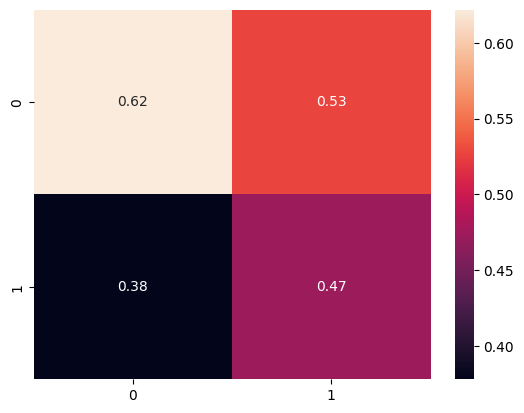

In [76]:
df_cm = pd.DataFrame(result, [0,1], [0,1])
sns.heatmap(df_cm, annot=True) 

Epoch 1/200
1/1 - 0s - 28ms/step - acc: 0.5878 - loss: 0.6807
Epoch 2/200
1/1 - 0s - 50ms/step - acc: 0.5899 - loss: 0.6806
Epoch 3/200
1/1 - 0s - 58ms/step - acc: 0.5906 - loss: 0.6804
Epoch 4/200
1/1 - 0s - 18ms/step - acc: 0.5913 - loss: 0.6803
Epoch 5/200
1/1 - 0s - 20ms/step - acc: 0.5906 - loss: 0.6801
Epoch 6/200
1/1 - 0s - 20ms/step - acc: 0.5906 - loss: 0.6800
Epoch 7/200
1/1 - 0s - 17ms/step - acc: 0.5906 - loss: 0.6799
Epoch 8/200
1/1 - 0s - 18ms/step - acc: 0.5913 - loss: 0.6798
Epoch 9/200
1/1 - 0s - 18ms/step - acc: 0.5928 - loss: 0.6796
Epoch 10/200
1/1 - 0s - 19ms/step - acc: 0.5920 - loss: 0.6795
Epoch 11/200
1/1 - 0s - 16ms/step - acc: 0.5906 - loss: 0.6794
Epoch 12/200
1/1 - 0s - 20ms/step - acc: 0.5899 - loss: 0.6793
Epoch 13/200
1/1 - 0s - 17ms/step - acc: 0.5906 - loss: 0.6791
Epoch 14/200
1/1 - 0s - 17ms/step - acc: 0.5913 - loss: 0.6790
Epoch 15/200
1/1 - 0s - 19ms/step - acc: 0.5920 - loss: 0.6789
Epoch 16/200
1/1 - 0s - 18ms/step - acc: 0.5942 - loss: 0.6788
E

<Axes: >

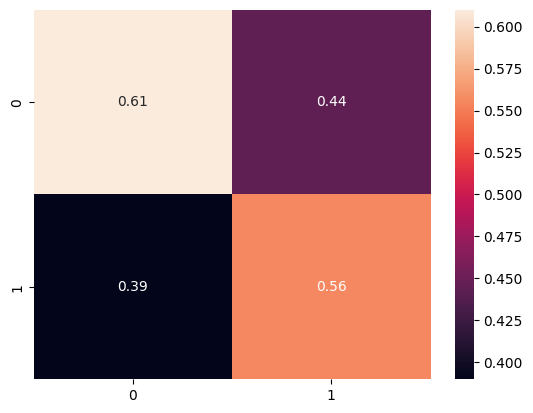

In [77]:
#Wrong. Don't use this

model.fit(X_train, y_train, epochs=200, batch_size=len(data),  verbose=2)
predections = model.predict(X_test)
rounded = [int(round(x[0])) for x in predections]
result = confusion_matrix(y_test, rounded , normalize='pred')
df_cm = pd.DataFrame(result, [0,1], [0,1])
sns.heatmap(df_cm, annot=True) 

Epoch 1/500
1/1 - 0s - 17ms/step - acc: 0.5935 - loss: 0.6729
Epoch 2/500
1/1 - 0s - 18ms/step - acc: 0.5928 - loss: 0.6729
Epoch 3/500
1/1 - 0s - 62ms/step - acc: 0.5928 - loss: 0.6728
Epoch 4/500
1/1 - 0s - 54ms/step - acc: 0.5928 - loss: 0.6728
Epoch 5/500
1/1 - 0s - 18ms/step - acc: 0.5928 - loss: 0.6728
Epoch 6/500
1/1 - 0s - 23ms/step - acc: 0.5928 - loss: 0.6728
Epoch 7/500
1/1 - 0s - 22ms/step - acc: 0.5928 - loss: 0.6728
Epoch 8/500
1/1 - 0s - 59ms/step - acc: 0.5928 - loss: 0.6728
Epoch 9/500
1/1 - 0s - 19ms/step - acc: 0.5928 - loss: 0.6728
Epoch 10/500
1/1 - 0s - 18ms/step - acc: 0.5935 - loss: 0.6728
Epoch 11/500
1/1 - 0s - 20ms/step - acc: 0.5935 - loss: 0.6728
Epoch 12/500
1/1 - 0s - 57ms/step - acc: 0.5935 - loss: 0.6728
Epoch 13/500
1/1 - 0s - 19ms/step - acc: 0.5935 - loss: 0.6728
Epoch 14/500
1/1 - 0s - 19ms/step - acc: 0.5935 - loss: 0.6728
Epoch 15/500
1/1 - 0s - 20ms/step - acc: 0.5935 - loss: 0.6728
Epoch 16/500
1/1 - 0s - 21ms/step - acc: 0.5935 - loss: 0.6728
E

<Axes: >

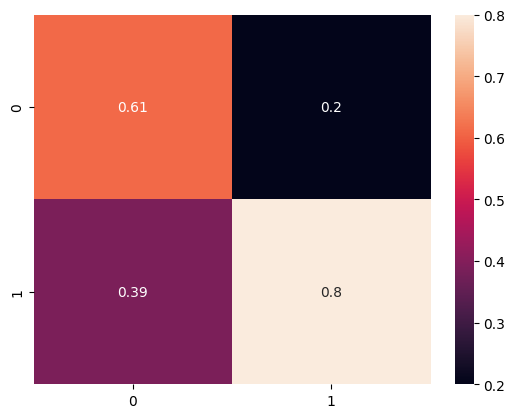

In [78]:
#Wrong. Don't use this

model.fit(X_train, y_train, epochs=500, batch_size=len(data),  verbose=2)
predections = model.predict(X_test)
rounded = [int(round(x[0])) for x in predections]
result = confusion_matrix(y_test, rounded , normalize='pred')
df_cm = pd.DataFrame(result, [0,1], [0,1])
sns.heatmap(df_cm, annot=True) 

Epoch 1/700
1/1 - 0s - 40ms/step - acc: 0.5956 - loss: 0.6710
Epoch 2/700
1/1 - 0s - 27ms/step - acc: 0.5956 - loss: 0.6710
Epoch 3/700
1/1 - 0s - 57ms/step - acc: 0.5956 - loss: 0.6710
Epoch 4/700
1/1 - 0s - 54ms/step - acc: 0.5956 - loss: 0.6710
Epoch 5/700
1/1 - 0s - 56ms/step - acc: 0.5956 - loss: 0.6710
Epoch 6/700
1/1 - 0s - 22ms/step - acc: 0.5956 - loss: 0.6710
Epoch 7/700
1/1 - 0s - 56ms/step - acc: 0.5956 - loss: 0.6710
Epoch 8/700
1/1 - 0s - 17ms/step - acc: 0.5956 - loss: 0.6710
Epoch 9/700
1/1 - 0s - 20ms/step - acc: 0.5956 - loss: 0.6710
Epoch 10/700
1/1 - 0s - 16ms/step - acc: 0.5956 - loss: 0.6710
Epoch 11/700
1/1 - 0s - 19ms/step - acc: 0.5956 - loss: 0.6710
Epoch 12/700
1/1 - 0s - 16ms/step - acc: 0.5956 - loss: 0.6710
Epoch 13/700
1/1 - 0s - 17ms/step - acc: 0.5956 - loss: 0.6710
Epoch 14/700
1/1 - 0s - 19ms/step - acc: 0.5956 - loss: 0.6710
Epoch 15/700
1/1 - 0s - 19ms/step - acc: 0.5956 - loss: 0.6710
Epoch 16/700
1/1 - 0s - 17ms/step - acc: 0.5956 - loss: 0.6710
E

<Axes: >

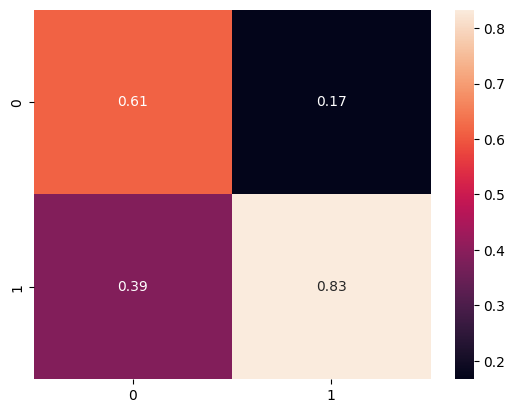

In [79]:
#Wrong. Don't use this

model.fit(X_train, y_train, epochs=700, batch_size=len(data),  verbose=2)
predections = model.predict(X_test)
rounded = [int(round(x[0])) for x in predections]
result = confusion_matrix(y_test, rounded , normalize='pred')
df_cm = pd.DataFrame(result, [0,1], [0,1])
sns.heatmap(df_cm, annot=True) 

Epoch 1/1000
1/1 - 0s - 28ms/step - acc: 0.5999 - loss: 0.6685
Epoch 2/1000
1/1 - 0s - 54ms/step - acc: 0.5999 - loss: 0.6685
Epoch 3/1000
1/1 - 0s - 20ms/step - acc: 0.5999 - loss: 0.6685
Epoch 4/1000
1/1 - 0s - 19ms/step - acc: 0.5999 - loss: 0.6685
Epoch 5/1000
1/1 - 0s - 17ms/step - acc: 0.5999 - loss: 0.6685
Epoch 6/1000
1/1 - 0s - 16ms/step - acc: 0.5999 - loss: 0.6685
Epoch 7/1000
1/1 - 0s - 20ms/step - acc: 0.5999 - loss: 0.6685
Epoch 8/1000
1/1 - 0s - 17ms/step - acc: 0.5999 - loss: 0.6685
Epoch 9/1000
1/1 - 0s - 16ms/step - acc: 0.5999 - loss: 0.6685
Epoch 10/1000
1/1 - 0s - 19ms/step - acc: 0.5999 - loss: 0.6685
Epoch 11/1000
1/1 - 0s - 17ms/step - acc: 0.5999 - loss: 0.6685
Epoch 12/1000
1/1 - 0s - 16ms/step - acc: 0.5999 - loss: 0.6685
Epoch 13/1000
1/1 - 0s - 20ms/step - acc: 0.5999 - loss: 0.6685
Epoch 14/1000
1/1 - 0s - 23ms/step - acc: 0.5999 - loss: 0.6685
Epoch 15/1000
1/1 - 0s - 17ms/step - acc: 0.5999 - loss: 0.6685
Epoch 16/1000
1/1 - 0s - 16ms/step - acc: 0.5999 

<Axes: >

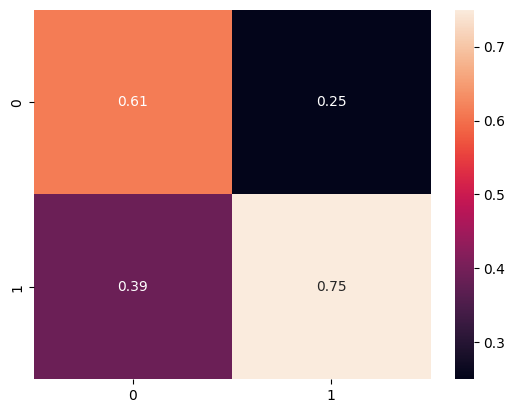

In [80]:
#Wrong. Don't use this

model.fit(X_train, y_train, epochs=1000, batch_size=len(data),  verbose=2)
predections = model.predict(X_test)
rounded = [int(round(x[0])) for x in predections]
result = confusion_matrix(y_test, rounded , normalize='pred')
df_cm = pd.DataFrame(result, [0,1], [0,1])
sns.heatmap(df_cm, annot=True) 

Epoch 1/1500
1/1 - 0s - 25ms/step - acc: 0.6020 - loss: 0.6643
Epoch 2/1500
1/1 - 0s - 17ms/step - acc: 0.6020 - loss: 0.6643
Epoch 3/1500
1/1 - 0s - 19ms/step - acc: 0.6020 - loss: 0.6643
Epoch 4/1500
1/1 - 0s - 16ms/step - acc: 0.6020 - loss: 0.6643
Epoch 5/1500
1/1 - 0s - 17ms/step - acc: 0.6020 - loss: 0.6643
Epoch 6/1500
1/1 - 0s - 16ms/step - acc: 0.6020 - loss: 0.6642
Epoch 7/1500
1/1 - 0s - 19ms/step - acc: 0.6020 - loss: 0.6642
Epoch 8/1500
1/1 - 0s - 16ms/step - acc: 0.6020 - loss: 0.6642
Epoch 9/1500
1/1 - 0s - 60ms/step - acc: 0.6020 - loss: 0.6642
Epoch 10/1500
1/1 - 0s - 24ms/step - acc: 0.6020 - loss: 0.6642
Epoch 11/1500
1/1 - 0s - 17ms/step - acc: 0.6020 - loss: 0.6642
Epoch 12/1500
1/1 - 0s - 18ms/step - acc: 0.6020 - loss: 0.6642
Epoch 13/1500
1/1 - 0s - 61ms/step - acc: 0.6020 - loss: 0.6642
Epoch 14/1500
1/1 - 0s - 25ms/step - acc: 0.6020 - loss: 0.6642
Epoch 15/1500
1/1 - 0s - 58ms/step - acc: 0.6020 - loss: 0.6642
Epoch 16/1500
1/1 - 0s - 19ms/step - acc: 0.6020 

<Axes: >

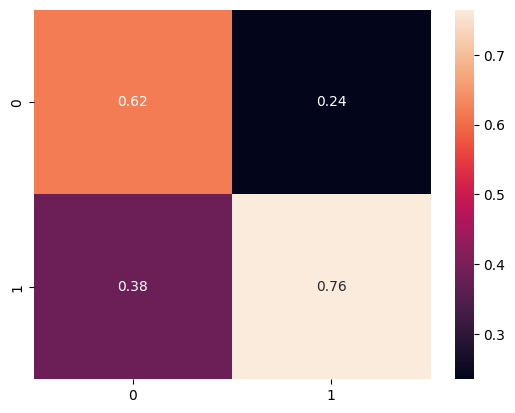

In [81]:
#Wrong. Don't use this

model.fit(X_train, y_train, epochs=1500, batch_size=len(data),  verbose=2)
predections = model.predict(X_test)
rounded = [int(round(x[0])) for x in predections]
result = confusion_matrix(y_test, rounded , normalize='pred')
df_cm = pd.DataFrame(result, [0,1], [0,1])
sns.heatmap(df_cm, annot=True) 

### 

Epoch 1/500
1/1 - 0s - 19ms/step - acc: 0.6176 - loss: 0.6570
Epoch 2/500


1/1 - 0s - 42ms/step - acc: 0.6176 - loss: 0.6570
Epoch 3/500
1/1 - 0s - 20ms/step - acc: 0.6176 - loss: 0.6570
Epoch 4/500
1/1 - 0s - 22ms/step - acc: 0.6176 - loss: 0.6570
Epoch 5/500
1/1 - 0s - 16ms/step - acc: 0.6176 - loss: 0.6569
Epoch 6/500
1/1 - 0s - 16ms/step - acc: 0.6176 - loss: 0.6569
Epoch 7/500
1/1 - 0s - 19ms/step - acc: 0.6176 - loss: 0.6569
Epoch 8/500
1/1 - 0s - 20ms/step - acc: 0.6176 - loss: 0.6569
Epoch 9/500
1/1 - 0s - 19ms/step - acc: 0.6176 - loss: 0.6569
Epoch 10/500
1/1 - 0s - 19ms/step - acc: 0.6176 - loss: 0.6569
Epoch 11/500
1/1 - 0s - 17ms/step - acc: 0.6176 - loss: 0.6569
Epoch 12/500
1/1 - 0s - 16ms/step - acc: 0.6176 - loss: 0.6569
Epoch 13/500
1/1 - 0s - 16ms/step - acc: 0.6176 - loss: 0.6569
Epoch 14/500
1/1 - 0s - 19ms/step - acc: 0.6176 - loss: 0.6569
Epoch 15/500
1/1 - 0s - 18ms/step - acc: 0.6176 - loss: 0.6569
Epoch 16/500
1/1 - 0s - 19ms/step - acc: 0.6183 - loss: 0.6569
Epoch 17/500
1/1 - 0s - 17ms/step - acc: 0.6183 - loss: 0.6569
Epoch 18/500

<Axes: >

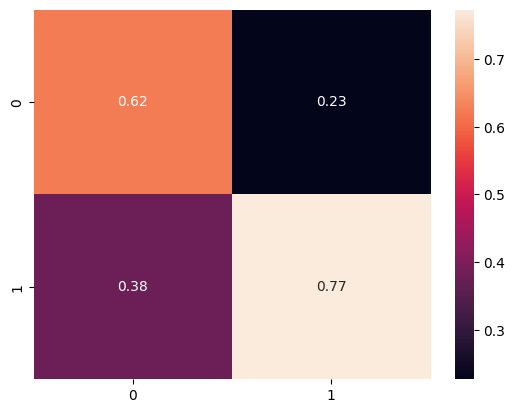

In [110]:
# Epoch = 500 is giving the best result.

features = list(data.columns)
features.pop()

X = data.loc[:, features]
Y = data.loc[:, ['Potability']]

# Splitting the data 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .70)


scaler = StandardScaler()
temp = scaler.fit_transform(X_train)
data2 = pd.DataFrame(temp, columns=X_train.columns)
X_train = data2

scaler2 = StandardScaler()
temp2 = scaler.fit_transform(X_test)
data21 = pd.DataFrame(temp2, columns=X_test.columns)
X_test = data21



model.fit(X_train, y_train, epochs=500, batch_size=len(data),  verbose=2)
predections = model.predict(X_test)
rounded = [int(round(x[0])) for x in predections]
result = confusion_matrix(y_test, rounded , normalize='pred')
df_cm = pd.DataFrame(result, [0,1], [0,1])
sns.heatmap(df_cm, annot=True) 

### Epoch = 500 is giving the best result

## April 10th ------------------------------------------------------------------------------

Here I'm trying to implement some simple Logistic Regression 

In [3]:
from sklearn.linear_model import LogisticRegression


In [28]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix


array([[251,   1],
       [146,   5]])

<Axes: >

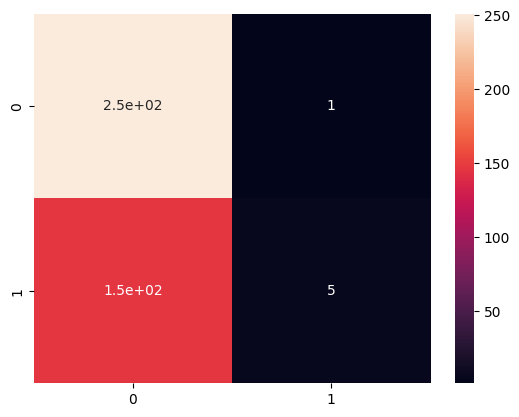

In [30]:
df_cm = pd.DataFrame(cnf_matrix, [0,1], [0,1])
sns.heatmap(df_cm, annot=True) 

### This is not working I think. The model is just saying everything is false/negative? That's why the number of values in the 0th index is significantly large when compared to the number of values in the 1st index

# Here I'm trying some simple SVN ----------------------------------------------------------

In [41]:
features = list(data.columns)
features.pop()

X = data.loc[:, features]
Y = data.loc[:, ['Potability']]

print(Y)

# Splitting the data 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .80)


scaler = StandardScaler()
temp = scaler.fit_transform(X_train)
data2 = pd.DataFrame(temp, columns=X_train.columns)
X_train = data2

scaler2 = StandardScaler()
temp2 = scaler.fit_transform(X_test)
data21 = pd.DataFrame(temp2, columns=X_test.columns)
X_test = data21


      Potability
0              0
1              0
2              0
3              0
4              0
...          ...
2006           1
2007           1
2008           1
2009           1
2010           1

[2011 rows x 1 columns]


In [44]:
from sklearn import svm
clf = svm.SVC(kernel='rbf') # Linear Kernel
from sklearn import metrics


#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.7196029776674938


/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
